# Clasificador de basura

# Importa librerias

In [0]:
import gc
import os
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [0]:

def grafica(train,test,clas):
    barWidth=0.2
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.bar(np.arange(len(train)), train, color="gold", width=barWidth, label="train");
    plt.bar([x + barWidth for x in np.arange(len(train))], test, color="crimson", width=barWidth, label="test");
    plt.xlabel("Clasificadores");
    plt.ylabel("Accuracy");
    plt.xticks([r + barWidth for r in range(len(train))], clas);
    plt.title("Accuracy de los clasificadores");
    plt.legend();
    plt.show();

In [0]:
path_imagenes = '../content/drive/My Drive/ColabNotebooks/20191-cv-master/Clasificador de basura/image_set128/'
nombre_imagenes = os.listdir(path_imagenes)
print nombre_imagenes

['11672.jpg', '20156.jpg', '12182.jpg', '12216.jpg', '20114.jpg', '00534.jpg', '02795.jpg', '00779.jpg', '10602.jpg', '10582.jpg', '22085.jpg', '22020.jpg', '10279.jpg', '22541.jpg', '21555.jpg', '11619.jpg', '21856.jpg', '21972.jpg', '22914.jpg', '00955.jpg', '02065.jpg', '10744.jpg', '01297.jpg', '11557.jpg', '21027.jpg', '01472.jpg', '02661.jpg', '02488.jpg', '02213.jpg', '01626.jpg', '21689.jpg', '02307.jpg', '00989.jpg', '10497.jpg', '02454.jpg', '21307.jpg', '12639.jpg', '22563.jpg', '22635.jpg', '12484.jpg', '11632.jpg', '01951.jpg', '10721.jpg', '21114.jpg', '21771.jpg', '10369.jpg', '02420.jpg', '22895.jpg', '21487.jpg', '22463.jpg', '00117.jpg', '01670.jpg', '01426.jpg', '12290.jpg', '12042.jpg', '10449.jpg', '11720.jpg', '12313.jpg', '10524.jpg', '01056.jpg', '22040.jpg', '20595.jpg', '02868.jpg', '01846.jpg', '10446.jpg', '10052.jpg', '12895.jpg', '20504.jpg', '02971.jpg', '22226.jpg', '01730.jpg', '12830.jpg', '00471.jpg', '20407.jpg', '02367.jpg', '01465.jpg', '11049.jpg'

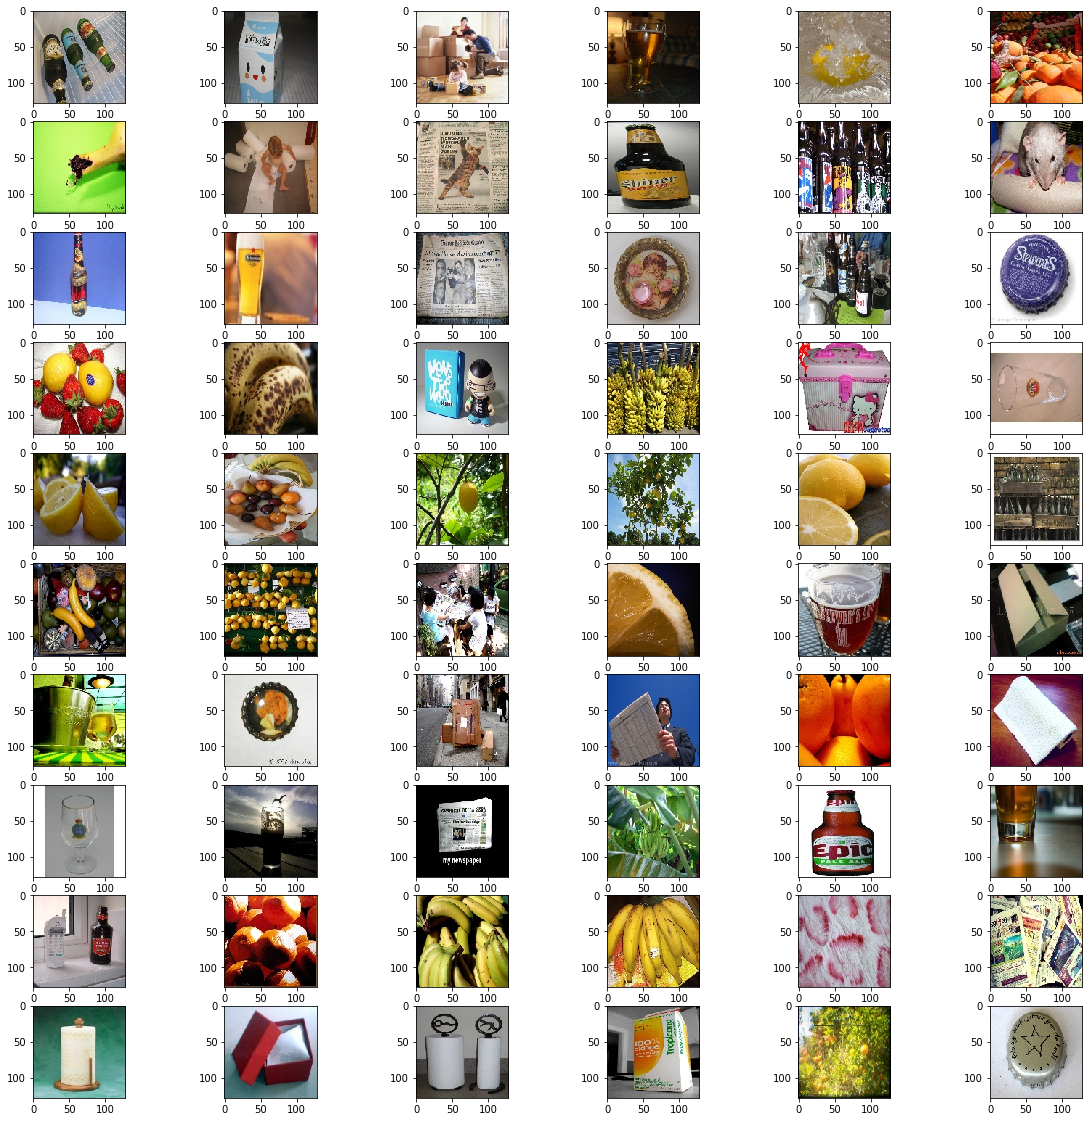

In [0]:
plt.figure(figsize=(20,20))
for i in range(1,61):
    path_image = path_imagenes+nombre_imagenes[i]
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
    plt.subplot(10,6,i)
    plt.imshow(img)

# Genera las X y Y

In [0]:
X=[]
Y=[]
for i,img_nombre in enumerate(nombre_imagenes):
    path_image = path_imagenes+img_nombre
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
    height, width, depth = img.shape
    X.append(img.reshape(height*width*depth))
    Y.append(nombre_imagenes[i][0])


In [0]:
X=np.array(X)
Y=np.array(Y,dtype=int)

In [0]:
n = int(len(X)*0.8)
tam=range(len(Y))
perm = np.random.permutation(len(tam))
X_train = X[perm[:n]]
Y_train = Y[perm[:n]]
X_test = X[perm[n:]]
Y_test = Y[perm[n:]]

('dimensiones train', (1336, 49152), (1336,))
('dimsensions test ', (334, 49152), (334,))

GaussianNB()
('acierto en train', 0.5913173652694611)
('acierto en test ', 0.5838323353293413)

RandomForestClassifier(n_estimators=10)
('acierto en train', 0.9910179640718563)
('acierto en test ', 0.5868263473053892)

SVC(kernel='linear')
('acierto en train', 1.0)
('acierto en test ', 0.5718562874251497)

KNeighborsClassifier(n_neighbors=10)
('acierto en train', 0.6085329341317365)
('acierto en test ', 0.5359281437125748)



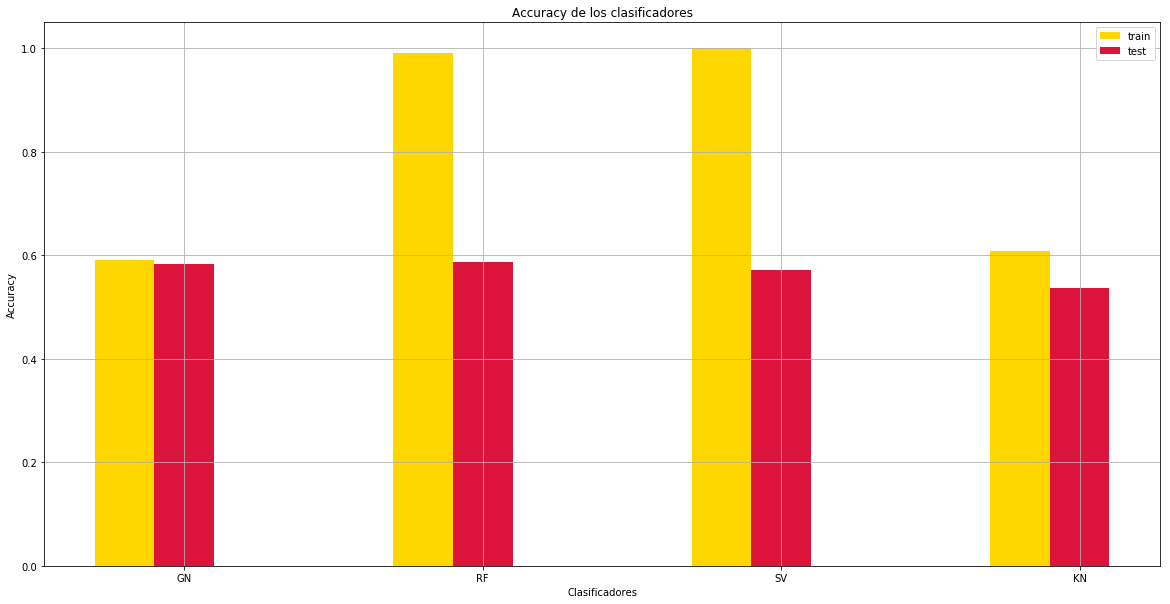

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

GN_est = GaussianNB()
RF_est = RandomForestClassifier(n_estimators=10)
SV_est = SVC(kernel='linear')
KN_est = KNeighborsClassifier(n_neighbors=10)

KN_train=[]
KN_test=[]
clas=[]
print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("GaussianNB()")
GN_est.fit(X_train, Y_train)
KN_train.append(GN_est.score(X_train, Y_train))
KN_test.append(GN_est.score(X_test, Y_test))
clas.append("GN")
print ("acierto en train", GN_est.score(X_train, Y_train))
print ("acierto en test ", GN_est.score(X_test, Y_test))
print ("")

print ("RandomForestClassifier(n_estimators=10)")
RF_est.fit(X_train, Y_train)
KN_train.append(RF_est.score(X_train, Y_train))
KN_test.append(RF_est.score(X_test, Y_test))
clas.append("RF")
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")

print ("SVC(kernel='linear')")
SV_est.fit(X_train, Y_train)
KN_train.append(SV_est.score(X_train, Y_train))
KN_test.append(SV_est.score(X_test, Y_test))
clas.append("SV")
print ("acierto en train", SV_est.score(X_train, Y_train))
print ("acierto en test ", SV_est.score(X_test, Y_test))
print ("")

print ("KNeighborsClassifier(n_neighbors=10)")
KN_est.fit(X_train, Y_train)
KN_train.append(KN_est.score(X_train, Y_train))
KN_test.append(KN_est.score(X_test, Y_test))
clas.append("KN")
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")

grafica(KN_train,KN_test,clas)

### RandomForestClassifier

El numero K con el mejor accuracy es: 25


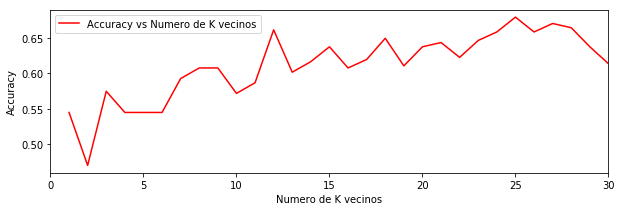

In [0]:
x=[]
y=[]
maxi=0;
for i in range(1,31):
    neigh = RandomForestClassifier(n_estimators=i)
    neigh.fit(X_train, Y_train)
    x.append(i)
    score=neigh.score(X_test,Y_test)
    y.append(score) 
    if score>maxi:
        maxi=score
        ma=i
print "El numero K con el mejor accuracy es:",ma
nf=ma
plt.figure(figsize=(10,3))
plt.plot(x,y, color="red",label="Accuracy vs Numero de K vecinos")
plt.xlabel("Numero de K vecinos")
plt.ylabel("Accuracy")
plt.xlim(0,30)
plt.legend()

### KNeighborsClassifier

El numero K con el mejor accuracy es: 21


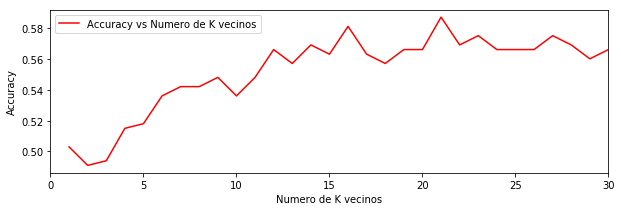

In [0]:
x=[]
y=[]
maxi=0;
for i in range(1,31):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    x.append(i)
    score=neigh.score(X_test,Y_test)
    y.append(score) 
    if score>maxi:
        maxi=score
        ma=i
print "El numero K con el mejor accuracy es:",ma
num=ma
plt.figure(figsize=(10,3))
plt.plot(x,y, color="red",label="Accuracy vs Numero de K vecinos")
plt.xlabel("Numero de K vecinos")
plt.ylabel("Accuracy")
plt.xlim(0,30)
plt.legend()

('dimensiones train', (1336, 49152), (1336,))
('dimsensions test ', (334, 49152), (334,))

RandomForestClassifier(n_estimators=25)
('acierto en train', 0.9985029940119761)
('acierto en test ', 0.6616766467065869)

KNeighborsClassifier(n_neighbors=21)
('acierto en train', 0.5741017964071856)
('acierto en test ', 0.5868263473053892)



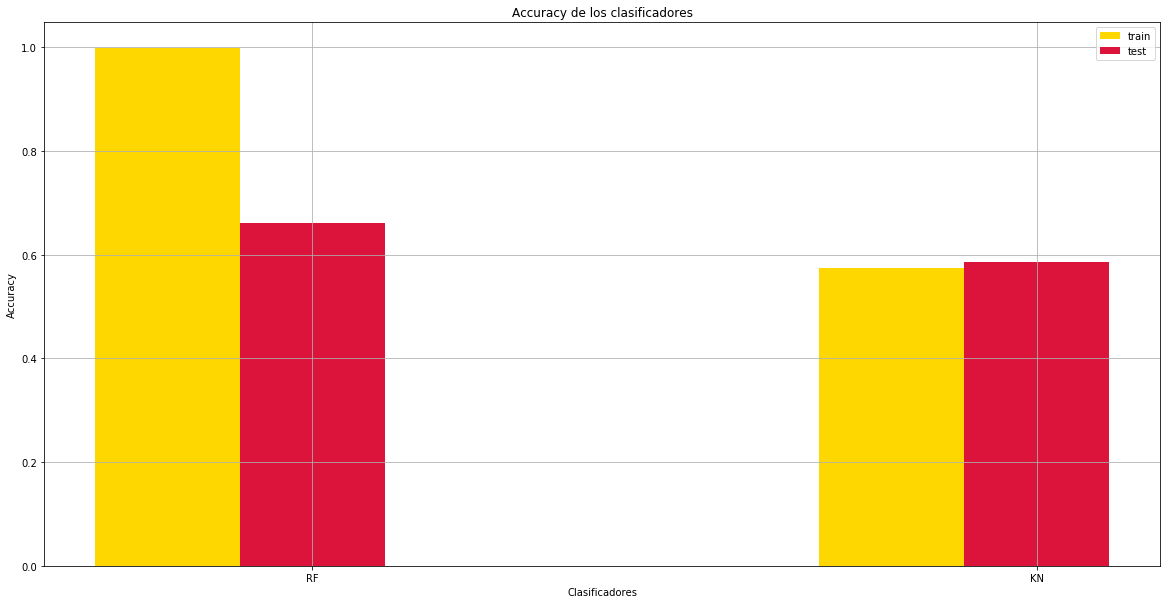

In [0]:
RF_est = RandomForestClassifier(n_estimators=nf)
KN_est = KNeighborsClassifier(n_neighbors=num)

train=[]
test=[]
clas=[]
print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("RandomForestClassifier(n_estimators="+str(nf)+")")
RF_est.fit(X_train, Y_train)
train.append(RF_est.score(X_train, Y_train))
RF_train=RF_est.score(X_train, Y_train)
test.append(RF_est.score(X_test, Y_test))
RF_test=RF_est.score(X_test, Y_test)
clas.append("RF")
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")


print ("KNeighborsClassifier(n_neighbors="+str(num)+")")
KN_est.fit(X_train, Y_train)
train.append(KN_est.score(X_train, Y_train))
KN_train=KN_est.score(X_train, Y_train)
test.append(KN_est.score(X_test, Y_test))
KN_test=KN_est.score(X_test, Y_test)
clas.append("KN")
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")
grafica(train,test,clas)

# Pruebas

In [0]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [0]:
X_train.shape

(1336, 49152)

In [0]:
X_train=X_train.reshape(1336,128,128,3)

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[128, 128, 3]),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(400, activation=tf.nn.swish),
    keras.layers.Dense(300, activation=tf.nn.elu),
    keras.layers.Dense(200, activation=tf.nn.swish),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

W0821 04:43:47.191870 140546028681088 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               24576500  
_________________________________________________________________
dense_1 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=70, epochs=50, verbose=1)

Epoch 1/50
1336/1336 [==============================] - 3s 2ms/sample - loss: 2370.6165 - acc: 0.3525
Epoch 2/50
1336/1336 [==============================] - 3s 2ms/sample - loss: 544.7459 - acc: 0.4034
Epoch 3/50
1336/1336 [==============================] - 3s 2ms/sample - loss: 280.6189 - acc: 0.4326
Epoch 4/50
1336/1336 [==============================] - 3s 2ms/sample - loss: 66.4881 - acc: 0.5247
Epoch 5/50
1336/1336 [==============================] - 3s 2ms/sample - loss: 48.5332 - acc: 0.4633
Epoch 6/50
1336/1336 [==============================] - 3s 2ms/sample - loss: 32.2705 - acc: 0.5060
Epoch 7/50
1336/1336 [==============================] - 3s 2ms/sample - loss: 64.4232 - acc: 0.4738
Epoch 8/50
1336/1336 [==============================] - 3s 2ms/sample - loss: 19.6799 - acc: 0.5539
Epoch 9/50
1336/1336 [==============================] - 3s 2ms/sample - loss: 24.5892 - acc: 0.5217
Epoch 10/50
1336/1336 [==============================] - 3s 2ms/sample - loss: 22.0123 - acc: 0.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class_names = ['','1','2', '3']


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(128, 128,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [0]:
X_test.shape


(334, 49152)

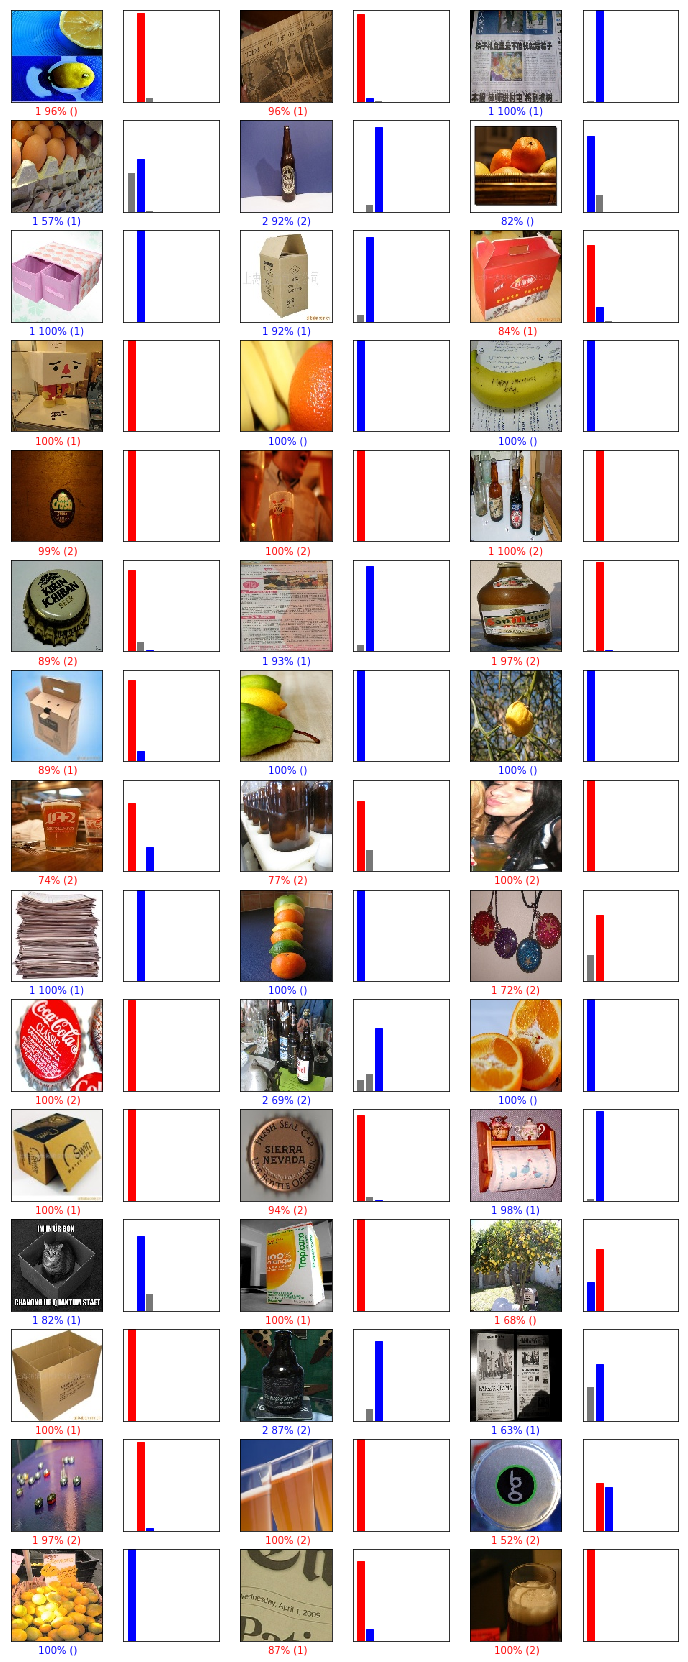

In [0]:
X_test=X_test.reshape(334,128,128,3)
predictions = model.predict(X_test)
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, Y_test)